In [1]:
#Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Loading dataset into data_set variable
data_set = pd.read_csv('Soil_samples_check_against_fertilizer_2018-2020.csv')

In [3]:
data_set.shape

(1325, 18)

In [4]:
# Preview data
data_set.head(25)

,POINTID,Depth,EC,N,P,K,OC,Ca,S,pH_H2O,Fertilizer(N:P:K),Fertilizer Quantity,N-After Fertilization,P-After Fertilization,K-After Fertilization,Ca-After Fertilization,S-After Fertilization,Elevation
0,47862690,0-20 cm,8.73,74.4,106.2,246.7,12.4,1591.9,12.8,4.81,MOP(0:0:60),290,74.4,106.2,329.0,1591.9,12.8,158
1,47882704,0-20 cm,5.06,56.9,132.3,195.2,16.7,919.8,28.5,4.93,Ammonium Sulphate(AS),40,113.9,132.3,195.2,919.8,38.1,500
2,47982688,0-20 cm,12.53,43.9,29.5,99.1,47.5,1539.7,15.4,4.85,Ammonium Sulphate(AS),210,121.9,29.5,99.1,1539.7,29.9,404
3,48022702,0-20 cm,21.10,20.2,88.8,225.2,28.1,1441.0,25.4,5.80,YaraMila NK(1:0:1),40,37.6,88.8,240.0,1441.0,25.4,364
4,48062708,0-20 cm,10.89,12.5,88.6,205.9,19.4,1466.7,26.2,6.48,YaraMila NK(1:0:1),150,38.6,88.6,223.9,1466.7,26.2,315
5,48122730,0-20 cm,14.46,79.1,108.6,75.0,18,1158.7,25.7,6.81,Calcium Ammonium Nitrate(CAN),150,89.3,108.6,75.0,1221.0,25.7,137
6,48202738,0-20 cm,17.08,40.3,137.7,165.8,12.5,1022.7,29.0,6.37,Urea(46:0:0),90,68.9,137.7,165.8,1022.7,29.0,131
7,48222780,0-20 cm,23.55,78.1,31.9,262.8,22.9,1128.4,22.8,7.98,YaraMila NK(1:0:1),40,99.3,31.9,300.6,1128.4,22.8,137
8,48342774,0-20 cm,22.61,18.0,50.2,138.3,29.1,1589.9,18.7,8.09,Urea(46:0:0),40,33.3,50.2,138.3,1589.9,18.7,514
9,48442784,0-20 cm,14.94,52.6,121.9,109.5,14.4,1261.1,21.5,7.84,Urea(46:0:0),40,69.6,121.9,109.5,1261.1,21.5,232


In [5]:
#Get summery of the data
data_set.describe()

,POINTID,EC,N,P,K,Ca,S,pH_H2O,Fertilizer Quantity,N-After Fertilization,P-After Fertilization,K-After Fertilization,Ca-After Fertilization,S-After Fertilization,Elevation
count,1.325000e+03,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000
mean,5.041128e+07,18.292143,48.714642,82.494113,163.867245,1203.790491,20.349887,6.310921,135.101887,73.798943,97.325811,185.792075,1216.589585,22.368906,786.878491
std,6.698252e+06,17.963201,23.575075,36.418550,61.060386,276.158962,5.182507,1.181918,92.512395,32.351661,45.678811,67.620452,278.626014,7.120122,1408.134160
min,2.718201e+07,2.890000,8.400000,19.500000,59.200000,721.600000,11.000000,3.460000,10.000000,8.400000,19.500000,59.200000,721.600000,11.000000,-30.000000
25%,4.618265e+07,8.590000,28.000000,49.900000,109.900000,966.700000,16.100000,5.470000,50.000000,49.600000,59.200000,132.200000,975.900000,16.800000,209.000000
50%,4.800287e+07,13.670000,48.400000,83.400000,166.600000,1214.600000,20.600000,6.380000,120.000000,72.600000,99.000000,184.600000,1231.300000,22.300000,490.000000
75%,5.562235e+07,21.900000,69.300000,113.900000,218.200000,1427.300000,24.700000,7.240000,200.000000,96.900000,129.500000,239.300000,1443.900000,26.700000,1058.000000
max,6.498167e+07,332.600000,89.500000,145.900000,269.000000,1688.700000,29.200000,8.720000,350.000000,163.700000,225.000000,348.700000,1808.900000,47.400000,11424.000000


In [6]:
# Check null values count
data_set.isnull().sum()

POINTID                   0
Depth                     0
EC                        0
N                         0
P                         0
K                         0
OC                        0
Ca                        0
S                         0
pH_H2O                    0
Fertilizer(N:P:K)         0
Fertilizer Quantity       0
N-After Fertilization     0
P-After Fertilization     0
K-After Fertilization     0
Ca-After Fertilization    0
S-After Fertilization     0
Elevation                 0
dtype: int64

In [7]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1325 entries, 0 to 1324
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   POINTID                 1325 non-null   int64  
 1   Depth                   1325 non-null   object 
 2   EC                      1325 non-null   float64
 3   N                       1325 non-null   float64
 4   P                       1325 non-null   float64
 5   K                       1325 non-null   float64
 6   OC                      1325 non-null   object 
 7   Ca                      1325 non-null   float64
 8   S                       1325 non-null   float64
 9   pH_H2O                  1325 non-null   float64
 10  Fertilizer(N:P:K)       1325 non-null   object 
 11  Fertilizer Quantity     1325 non-null   int64  
 12  N-After Fertilization   1325 non-null   float64
 13  P-After Fertilization   1325 non-null   float64
 14  K-After Fertilization   1325 non-null   

# Preprocess the dataset

Feature selection

In [8]:
# Drop unwanted columns for fertilizer prediction
data_set = data_set.drop(['POINTID','Depth','EC','OC','Ca','S','pH_H2O','Ca-After Fertilization','S-After Fertilization','Elevation','Fertilizer Quantity'], axis = 'columns')

In [9]:
data_set['Fertilizer(N:P:K)'].unique()

array(['MOP(0:0:60)', 'Ammonium Sulphate(AS)', 'YaraMila NK(1:0:1)',
       'Calcium Ammonium Nitrate(CAN)', 'Urea(46:0:0)', 'TSP(0:46:0)',
       'YaraMila NPKS(1:1:1)'], dtype=object)

In [10]:
# Select only Considering fertilizers from 'Fertilizer(N:P:K)' column
data_set = data_set[(data_set['Fertilizer(N:P:K)'] == 'TSP(0:46:0)') | (data_set['Fertilizer(N:P:K)'] == 'MOP(0:0:60)')|
                    (data_set['Fertilizer(N:P:K)'] == 'YaraMila NK(1:0:1)')| (data_set['Fertilizer(N:P:K)'] == 'YaraMila NPKS(1:1:1)')|
                    (data_set['Fertilizer(N:P:K)'] == 'Urea(46:0:0)')
                   ]

In [11]:
data_set['Fertilizer(N:P:K)'].value_counts()

Fertilizer(N:P:K)
YaraMila NPKS(1:1:1)    203
Urea(46:0:0)            193
MOP(0:0:60)             189
TSP(0:46:0)             185
YaraMila NK(1:0:1)      182
Name: count, dtype: int64

In [12]:
# Separate the input features and the target variable
X = data_set.drop('Fertilizer(N:P:K)', axis=1)
y = data_set['Fertilizer(N:P:K)']

In [13]:
# Split the data set to train and test data sets
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
x_train.shape, x_test.shape

((761, 6), (191, 6))

# Model Building

Decision Tree Classifier

In [14]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree classifier
dtc = DecisionTreeClassifier()

#Check model accuracy using accuracy score
dtc.fit(x_train, y_train)
dtc_predictions = dtc.predict(x_test)
dtc_accuracy = accuracy_score(y_test, dtc_predictions)

print("Decision Tree Classifier Accuracy:", dtc_accuracy)

Decision Tree Classifier Accuracy: 0.7539267015706806


Random Forest Classifier

In [15]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
rfc = RandomForestClassifier()

#Check model accuracy using accuracy score
rfc.fit(x_train, y_train)
rfc_predictions = rfc.predict(x_test)
rfc_accuracy = accuracy_score(y_test, rfc_predictions)

print("Random Forest Classifier Accuracy:", rfc_accuracy)


Random Forest Classifier Accuracy: 0.8638743455497382


Gradient Boosting Classifier

In [16]:
from sklearn.ensemble import GradientBoostingClassifier

# Create a Gradient Boosting classifier
gbc = GradientBoostingClassifier()

#Check model accuracy using accuracy score
gbc.fit(x_train, y_train)
gbc_predictions = gbc.predict(x_test)
gbc_accuracy = accuracy_score(y_test, gbc_predictions)

print("Gradient Bossting Classifier Accuracy:", gbc_accuracy)

Gradient Bossting Classifier Accuracy: 0.9214659685863874


Evaluate Performance

In [17]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Evaluate the model using various metrics
accuracy = accuracy_score(y_test, gbc_predictions)
precision = precision_score(y_test, gbc_predictions, average='weighted')
recall = recall_score(y_test, gbc_predictions, average='weighted')
f1 = f1_score(y_test, gbc_predictions, average='weighted')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9214659685863874
Precision: 0.9230726248430852
Recall: 0.9214659685863874
F1 Score: 0.921697992448591


In [18]:
#Check Feature Importance
importance = gbc.feature_importances_

# Print feature importance values
for feature_name, importance_value in zip(X.columns, importance):
    print(f"{feature_name}: {importance_value}")

N: 0.10887987421790728
P: 0.12454252518276804
K: 0.07754863309925931
N-After Fertilization: 0.2807704116387864
P-After Fertilization: 0.2672660910462801
K-After Fertilization: 0.1409924648149989


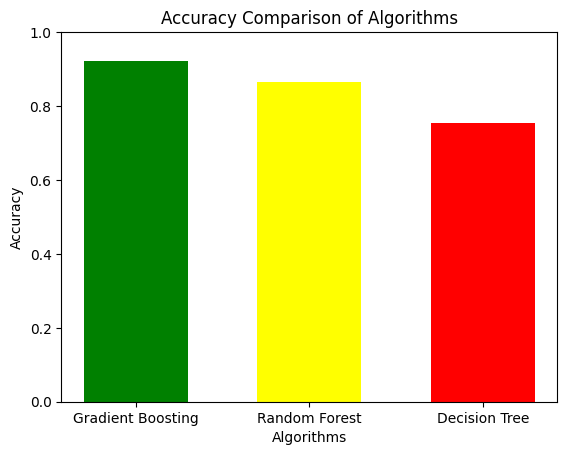

In [19]:
# Accuracy values
accuracies = [gbc_accuracy, rfc_accuracy, dtc_accuracy]
algorithms = ['Gradient Boosting', 'Random Forest', 'Decision Tree']

# Define colors and width
colors = ['green', 'yellow', 'red']
bar_width = 0.6

# Plotting the bar graph
plt.bar(algorithms, accuracies, color=colors, width=bar_width)
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Algorithms')
plt.ylim([0, 1]) 

# Display the plot
plt.show()


Hyperparameter Tuning

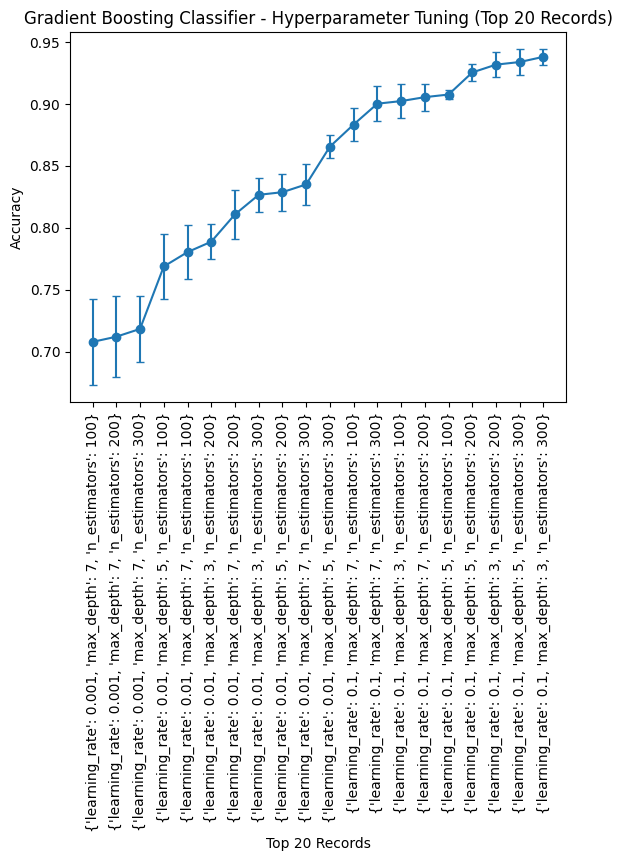

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of boosting stages
    'learning_rate': [0.1, 0.01, 0.001],  # Learning rate shrinks the contribution of each tree
    'max_depth': [3, 5, 7]  # Maximum depth of each tree
}

# Create the Gradient Boosting Classifier object
gb_classifier = GradientBoostingClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(gb_classifier, param_grid, cv=5, scoring=make_scorer(accuracy_score))

# Fit the data to perform the grid search
grid_search.fit(X, y)  # X is your input data, y is the target variable

# Retrieve the accuracy scores at each stage of hyperparameter tuning
mean_scores = grid_search.cv_results_['mean_test_score']
std_scores = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']

# Find the indices of the top 20 records with highest accuracy
top_indices = np.argsort(mean_scores)[-20:]
top_mean_scores = mean_scores[top_indices]
top_std_scores = std_scores[top_indices]
top_params = [str(params[i]) for i in top_indices]

# Plot the accuracy curve for the top 20 records
x = np.arange(len(top_indices))
plt.errorbar(x, top_mean_scores, yerr=top_std_scores, fmt='o-', capsize=3)
plt.xlabel('Top 20 Records')
plt.ylabel('Accuracy')
plt.title('Gradient Boosting Classifier - Hyperparameter Tuning (Top 20 Records)')

# Set the tick locations and labels
plt.xticks(x, top_params, rotation='vertical')

plt.tight_layout()
plt.show()

Save the model

In [27]:
best_model= grid_search.best_estimator_

In [28]:
best_model.fit(x_train,y_train)

GradientBoostingClassifier(n_estimators=300)

In [29]:
best_model.score(x_test,y_test)

0.9267015706806283

In [30]:
#Use Pickle library to save the model
import pickle
with open('Fertilizer_Predictor.pickle','wb') as file:
    pickle.dump(best_model,file)


In [31]:
best_model.predict([[12.0,40.2,148.3,12.0,40.2,201.3]])

array(['MOP(0:0:60)'], dtype=object)